# Partial Differential Equation (PDE) applied to option pricing models

Authors: Youssouf Bancé (20234008@etud.univ-evry.fr) and Youssef Louraoui (20230348@etud.univ-evry.fr)

## Black-Scholes option pricing model using Explicit Finite Difference method

In this part, we will see the results obtained for the Black-Scholes option pricing model using Explicit Finite Difference. 

This script uses the explicit finite difference method to solve the Black-Scholes PDE for option pricing. It then visualizes the option's price using two plotting methods. We start by downloading the required packages to be able to run the code. 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

**Parameters for the exercise**

These are the constants used in the model:

- K: Strike price.

- sigma: Volatility.

- tau: Time to maturity.

- r: Risk-free interest rate.

- b: Cost of carry.

- xmin, xmax: Min and Max stock prices for the grid.

- Nx: Number of grid points in stock price dimension.

- tmin, tmax: Min and Max times for the grid.

- Nt: Number of grid points in time dimension.

In [16]:
# Parameters

K = 100
sigma = 0.20
tau = 0.25
r = 0.08
b = -0.04
xmin = 50
xmax = 150
Nx = 201
tmin = 0
tmax = tau
Nt = 1000

**Grid definitions:**

Here, the spatial and temporal grid steps (dx, dt) are defined, and the grid itself is initialized.

In [17]:
#Computation of the parameters of the model

dx = (xmax - xmin) / (Nx - 1)
dt = (tmax - tmin) / Nt

x = np.linspace(xmin, xmax, Nx)
t = np.linspace(tmin, tmax, Nt)

**Process functions and boundary conditions:**

- Functions aProc, bProc, cProc, and dProc define the coefficients of the PDE.

- Functions tminBound, xminBound, xmaxBound, and DxmaxBound define the boundary conditions.

In [18]:
# Process functions and boundary conditions are identical in both versions, so we just keep one copy of them.

def aProc(t, x):
    return 0.5 * sigma**2 * x**2

def bProc(t, x):
    return b * x

def cProc(t, x):
    return r

def dProc(t, x):
    return 0

def tminBound(t, x):
    return max(x - K, 0)

def xminBound(t, x):
    return 0

def xmaxBound(t, x):
    return max(x - K, 0)

def DxmaxBound(t, x):
    return 1

**Grid initialization:**

This step initializes the grid (V) with zeros and sets boundary conditions for the option price based on the provided functions.

In [19]:
# Grid creation and boundary conditions initialization is also identical
V = np.zeros((Nx, Nt))
V[:, 0] = [tminBound(0, xi) for xi in x]
V[0, :] = [xminBound(ti, xmin) for ti in t]
V[-1, :] = [xmaxBound(ti, xmax) + DxmaxBound(ti, xmax) * (x[-1] - xmax) for ti in t]

**Time-stepping:**

This loop iteratively computes option prices over time and space using the explicit finite difference method.

In [20]:
# Time-stepping is the same
for j in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        Vxx = (V[i + 1, j] - 2 * V[i, j] + V[i - 1, j]) / dx**2
        Vx = (V[i + 1, j] - V[i - 1, j]) / (2 * dx)
        V[i, j + 1] = V[i, j] + dt * (aProc(t[j], x[i]) * Vxx + bProc(t[j], x[i]) * Vx + cProc(t[j], x[i]) * V[i, j] - r * V[i, j])

**Visualization:**

The first visualization plots a 3D surface plot that highlight the relationship between option prices, stock prices, and time to maturity.

<IPython.core.display.Javascript object>


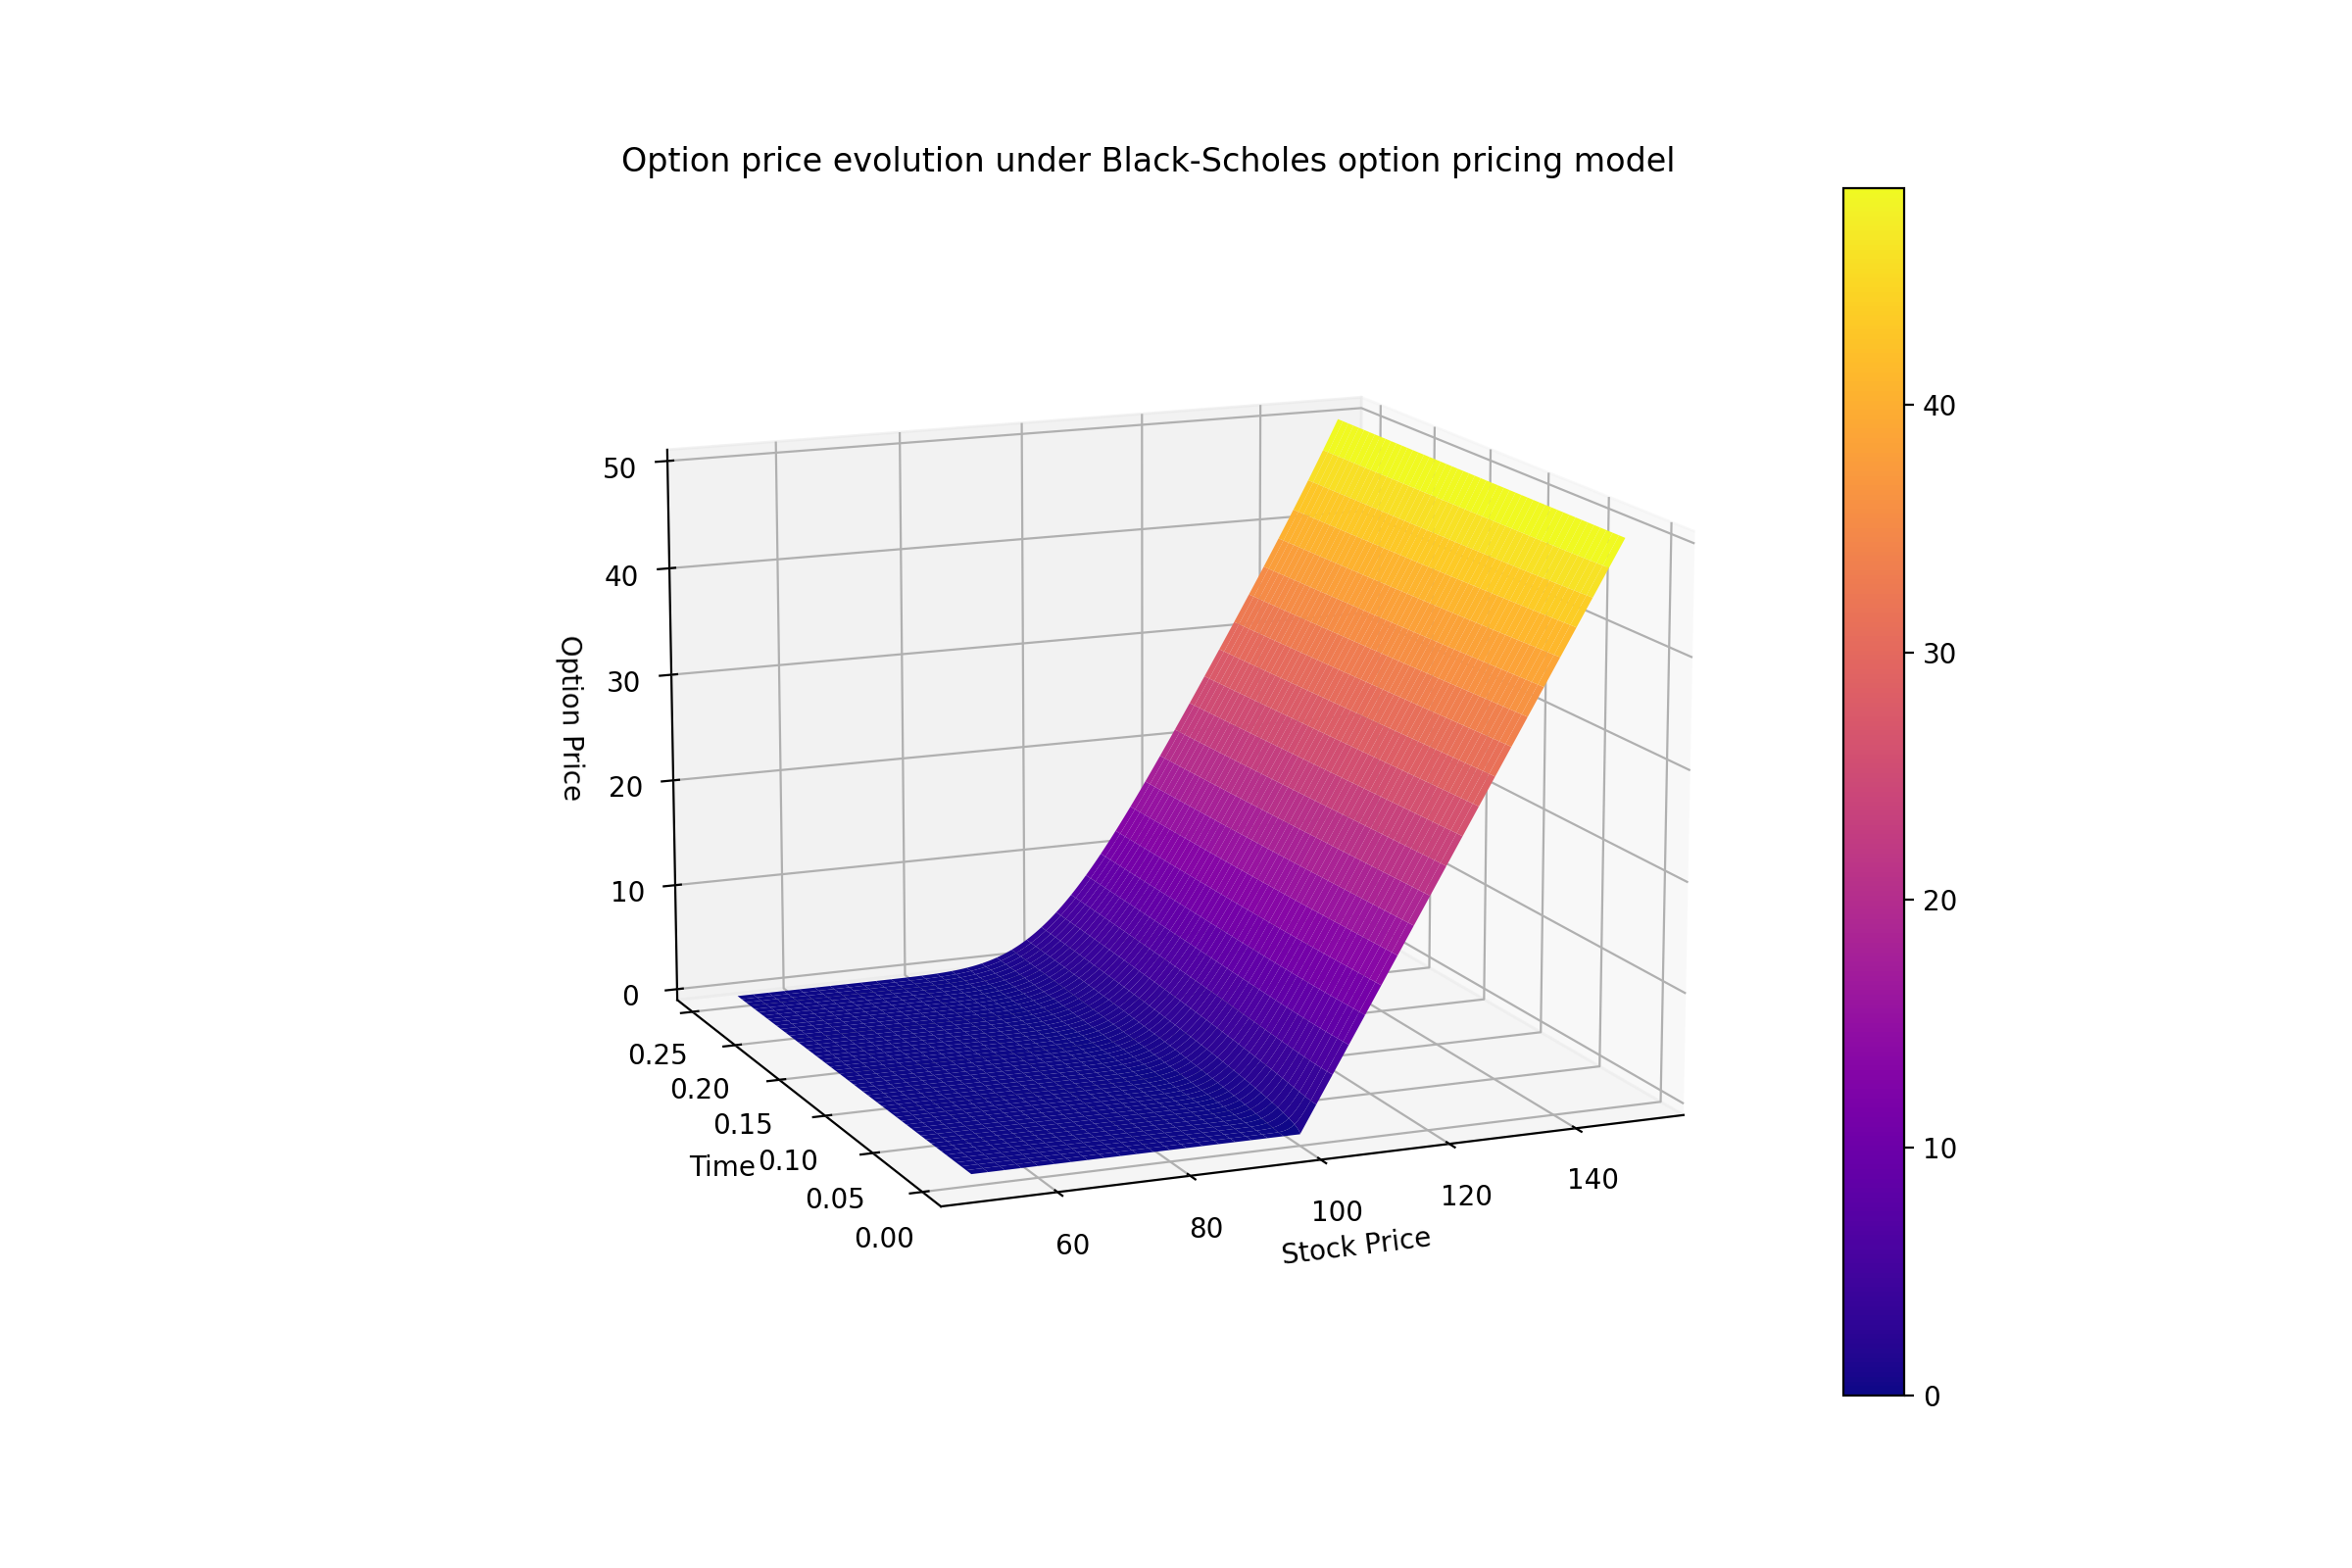

In [21]:
T, X = np.meshgrid(t, x)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, V, cmap='plasma', edgecolor='none')
ax.set_title('Option price evolution under Black-Scholes option pricing model')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time')
ax.set_zlabel('Option Price')
fig.colorbar(surf)
plt.show()

The second visualization shows option price evolution with respect to the underlying (stock) price.

<IPython.core.display.Javascript object>


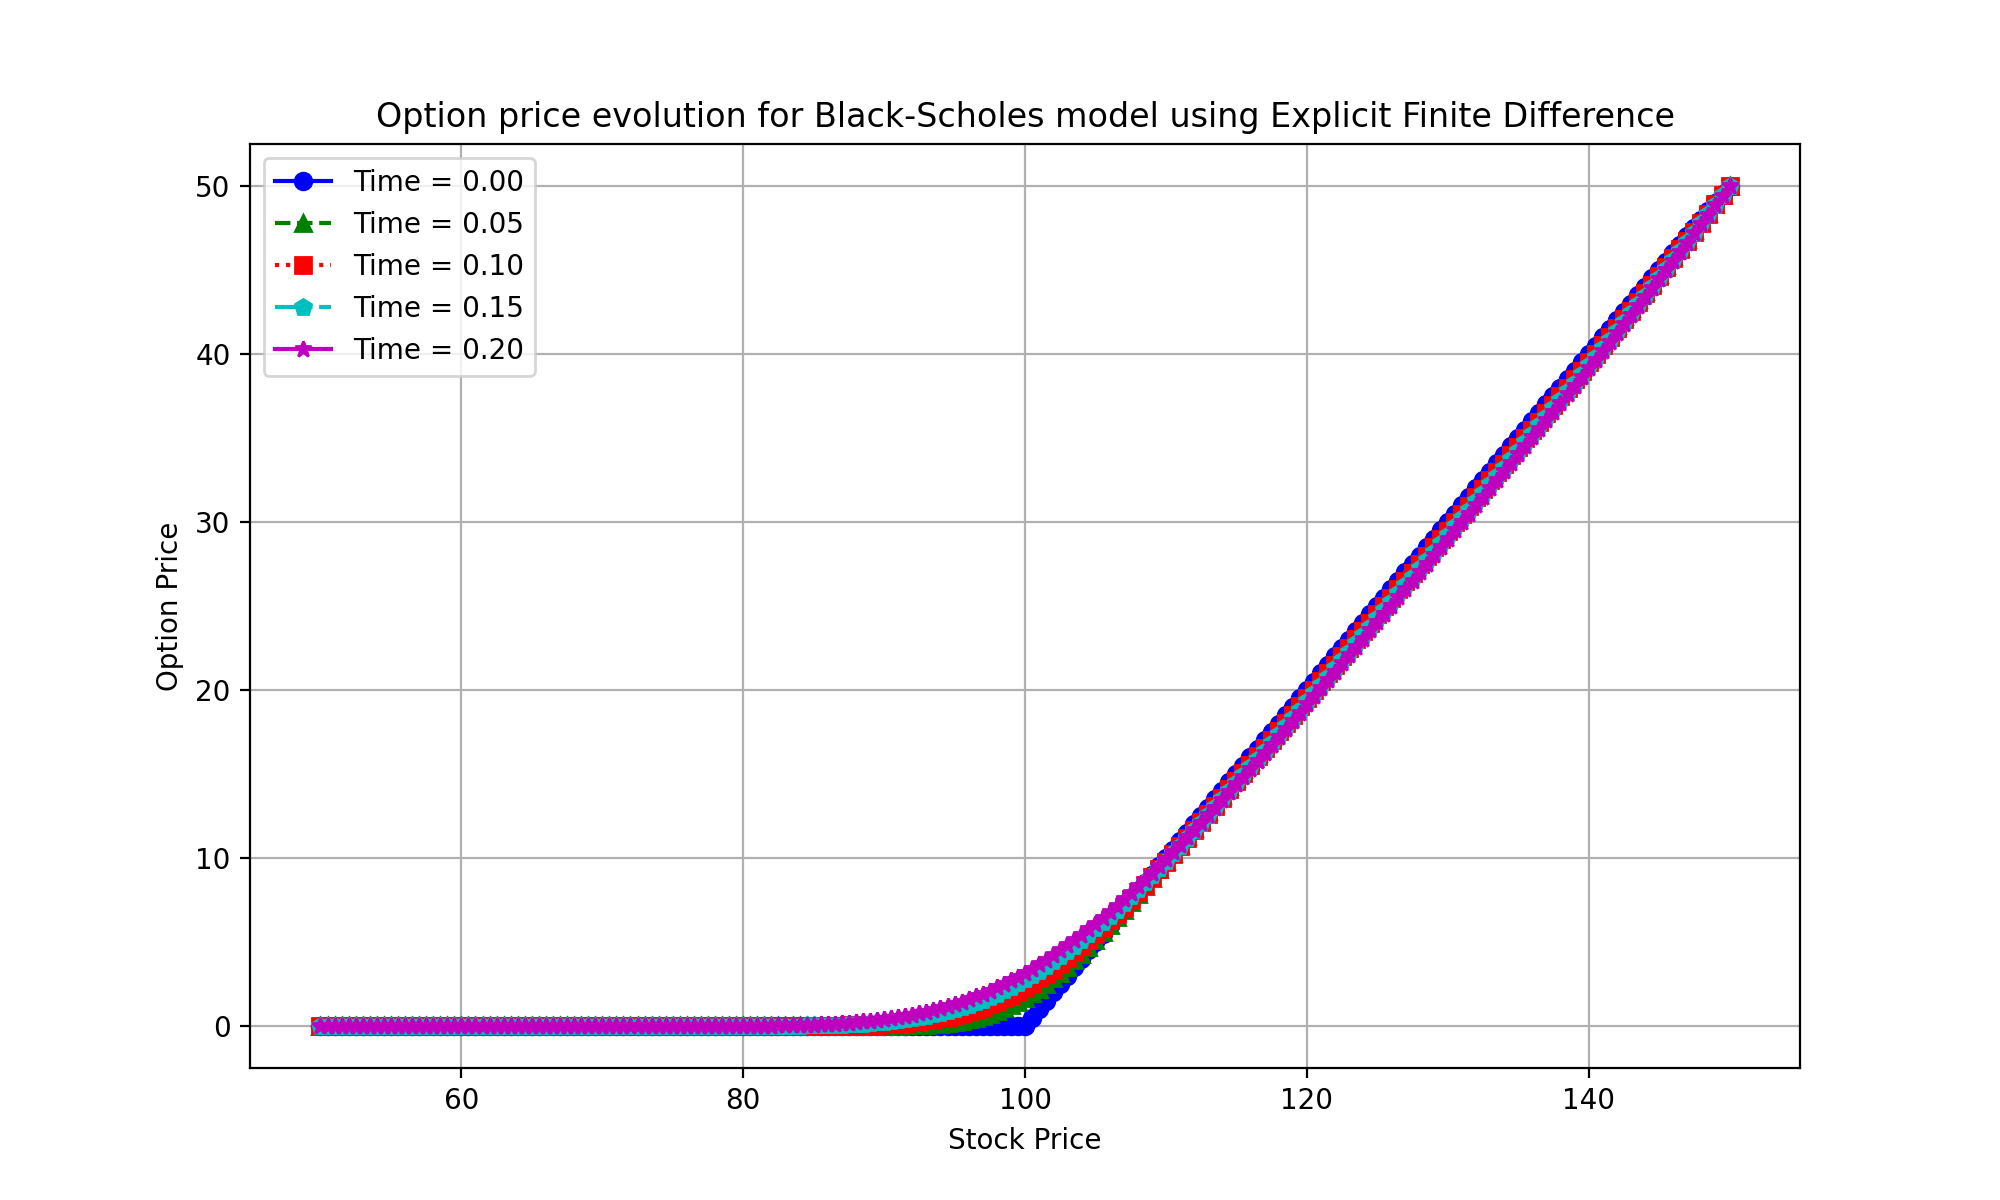

In [30]:
# Plot option prices in 2D for selected time steps.
plt.figure(figsize=(10, 6))
for j in range(0, Nt, int(Nt/5)):
    plt.plot(x, V[:, j], label=f'Time = {t[j]:.2f}')

plt.title('Option price evolution for Black-Scholes model using Explicit Finite Difference')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()


**Analysis of the Black Scholes option pricing model**

The adaptation of the Black-Scholes model using Finite Difference Methods (FDM) offers a structured approach for the valuation of European options, methodologically detailing the progression of stock prices and their temporal evolution. This approach discretizes the model's governing partial differential equation into a grid, facilitating the computation of option values through various iterative schemes, each with its own merits and drawbacks.

Inherent in the Black-Scholes model are assumptions of constant volatility and interest rates, simplifications that do not fully align with the more complex reality of financial markets where these parameters are subject to change. This discrepancy can lead to differences between the model's predictions and actual market prices. The model is specifically formulated for European options, which restricts its direct applicability to American options and other derivatives that allow for early exercise. The treatment of dividends within the model also presents limitations, necessitating modifications to accurately reflect their impact on option valuation.

The application of FDM is closely tied to the accurate imposition of boundary conditions at the edges of the price spectrum and at expiration. Any misapplication here can lead to valuation inaccuracies. The explicit variant of FDM, in particular, can be susceptible to issues of numerical stability and convergence, necessitating adherence to the Courant-Friedrichs-Lewy condition for methodological stability. Additionally, FDM can be computationally demanding, posing challenges when used for extensive temporal discretizations or in valuing multiple options simultaneously.

The Black-Scholes model's practicality depends on the calibration against market data and sensitivity analysis of model parameters. This calibration is essential for the model's successful application in financial markets, where understanding its limitations and theoretical underpinnings is crucial for a nuanced grasp of option pricing dynamics.

In summation, the Black-Scholes model, when implemented through FDM, is a fundamental tool in financial engineering despite its limitations and the computational challenges it presents. The continuous advancements in computational finance are refining these methods, bolstering their robustness, and enhancing their ability to depict complex financial instruments.

Regarding the script, the primary objective of this code is to uncover the evolution of option prices within the context of the Black-Scholes model while taking into account the associated model parameters and boundary conditions. Through the graphical presentation of the code's results, a comprehensive depiction of how option prices undergo changes over time is provided. This plot highlight the underlying Black-Scholes framework, and the results are plotted with respect to diverse stock prices. The code provides a 3D surface plot that highlight the relationship between option prices, stock prices, and time to maturity. This surface plot offers a holistic perspective by representing the option price as a function of both the underlying stock price and the time remaining until the option's expiration. The three-dimensional visualization uncovers how option prices fluctuate across a spectrum of stock prices and various time horizons. It provides valuable insights into option price dynamics within the Black-Scholes framework.

## Cox-Rubbinstein-Ross pricing model using Crank-Nicholson method

This script is used to solve the Cox-Ingersoll-Ross (CIR) model, a one-factor model often used to describe interest rate movements. It incorporates the impact of market price of risk. The Crank-Nicolson method, a popular finite difference technique, is employed for the numerical solution. The final output is a visualization of option price across different interest rates and time to expiry.

**Importing the necessary libraries:**
    
- **numpy** for numerical operations.
- **matplotlib.pyplot** for plotting.
- **solve_banded** function from the **scipy.linalg** package to solve linear systems of equations with banded matrices. 

In [21]:
import numpy as np
from scipy.linalg import solve_banded
import matplotlib.pyplot as plt
%matplotlib notebook

**Parameters Initialization:**

A set of model and grid parameters are initialized. 

Key model parameters are:

- kappa
- theta
- sigma

In [22]:
# Model parameters for the CIR model
kappa = 0.8
theta = 0.10
sigma = 0.5
tmin = 0
tmax = 5
Nt = 101
xmin = 0
xmax = 1
Nx = 51

**Grid definitions:**

dx, dt define the spatial and temporal grid steps, and grids x and t are initialized.

In [23]:
# Calculate spatial and temporal increments
dx = (xmax - xmin) / (Nx - 1)
dt = (tmax - tmin) / (Nt - 1)

# Create spatial and temporal discretizations
x = np.linspace(xmin, xmax, Nx)
t = np.linspace(tmin, tmax, Nt)

**Model functions:**

- mu: Drift term of the CIR model.
- sigma_func: Volatility term (with the square root dependency typical for the CIR model).
- lambda_func: Adjusted volatility term incorporating market price of risk.
- r: Instantaneous interest rate.
- aProc, bProc, cProc, and dProc: PDE coefficients.

In [24]:

# Define drift and volatility functions for the CIR model
def mu(t, x):
    return kappa * (theta - x)

def sigma_func(t, x):
    return sigma * np.sqrt(np.maximum(x, 0))  # Ensure non-negativity of x

# Define coefficient functions for the Crank-Nicolson scheme
def aProc(t, x):
    return 0.5 * sigma_func(t, x)**2

def bProc(t, x):
    return mu(t, x) - 0.5 * sigma_func(t, x)**2

def cProc(t, x):
    return x

# Boundary condition at xmax for a zero-coupon bond
def xmaxBound(t, K, theta):
    # Assuming bond payoff is 1 at maturity (t=0)
    return np.exp(-K * theta * t)

# Initial condition for the option price
V = np.ones((Nx, Nt))

**Crank-Nicolson method**

This is the core part:

- For each time step, matrices A and B are constructed. These matrices represent the discretized PDE coefficients for the Crank-Nicolson method.
- The boundary conditions for the next time step are set.
- For each spatial point, the relevant coefficients in matrices A and B are computed.
- Using A and B, the option value for the next time step is calculated.

In [25]:
# Crank-Nicolson finite difference method to solve the CIR model
for j in range(Nt - 1):
    A = np.zeros((3, Nx))  # A is the tridiagonal matrix for Crank-Nicolson
    rhs = np.zeros(Nx)  # Right-hand side
    
    # Setting up the diagonals of A and the right-hand side
    A[0, 1:] = -dt * aProc(t[j], x[:-1]) / (2 * dx**2)
    A[1, :] = 1 + dt * aProc(t[j], x) / (dx**2) + dt * cProc(t[j], x)
    A[2, :-1] = -dt * aProc(t[j], x[1:]) / (2 * dx**2)
    
    # Apply boundary conditions at xmin and xmax
    V[0, j+1] = xmaxBound(t[j+1], kappa, theta)  # Reflecting boundary condition at xmin
    V[-1, j+1] = xmaxBound(t[j+1], kappa, theta)  # Zero-coupon bond price at xmax

    # Set up the rhs using B matrix entries
    rhs[1:-1] = V[1:-1, j] + dt * (bProc(t[j], x[1:-1]) * (V[2:, j] - V[:-2, j]) / (2 * dx))
    rhs[0] = V[0, j+1]  # Boundary at xmin
    rhs[-1] = V[-1, j+1]  # Boundary at xmax

    # Solve the system for the next time step's option prices
    V[:, j+1] = solve_banded((1, 1), A, rhs)

**Plotting of the results:**

- The results are plotted in a 3D surface plot to show the evolution of bond prices with and respect to different levels of interest rates across time.
- Option prices at several selected time points are plotted against the spatial grid.

<IPython.core.display.Javascript object>


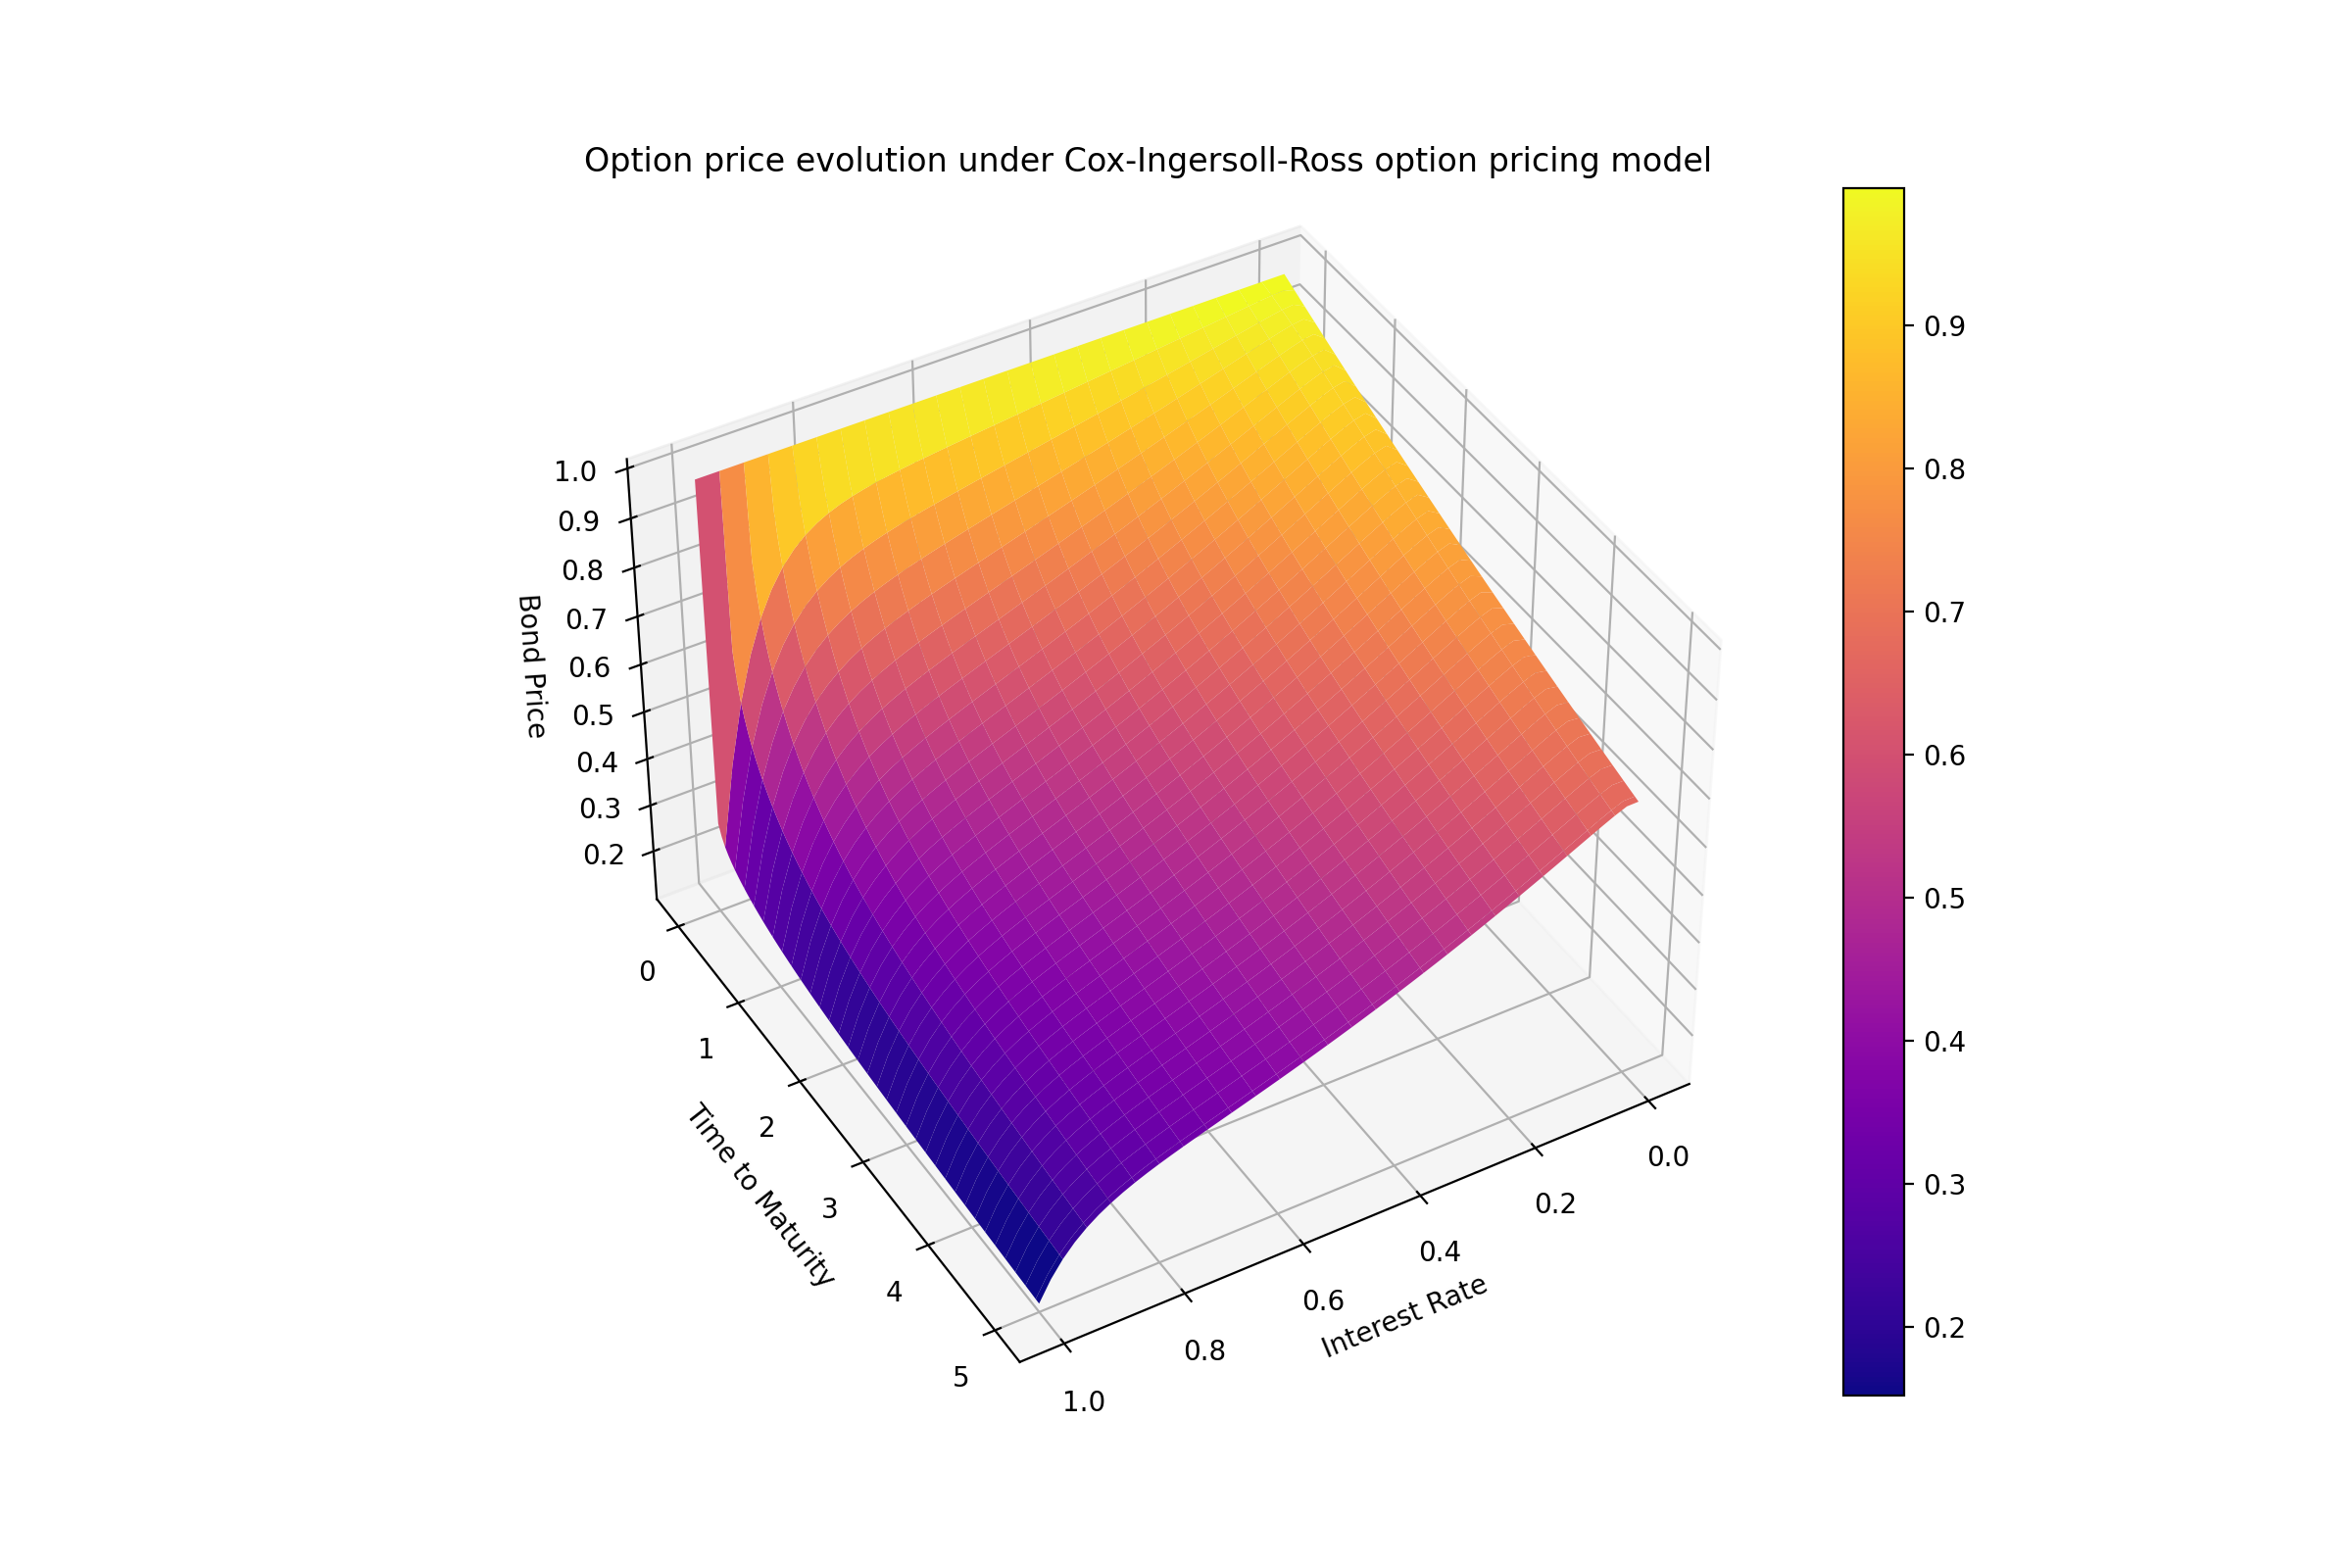

In [30]:
# Plotting the option price evolution over time
T, X = np.meshgrid(t, x)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, V, cmap='plasma', edgecolor='none')
ax.set_title('Option price evolution under Cox-Ingersoll-Ross option pricing model')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Time to Maturity')
ax.set_zlabel('Bond Price')
fig.colorbar(surf)
plt.show()

**Analysis of the CIR option pricing model**

A key concept in fixed-income quantitative modeling, the Cox-Ingersoll-Ross (CIR) model clarifies the complex relationship between interest rates, bond prices, and bond maturity. Based on stochastic calculus, this model captures the stochastic volatility and mean-reverting characteristics of interest rates. It reveals how these rates tend to oscillate around a long-term equilibrium while remaining non-negative, which is consistent with the reality of the economy, which generally rejects negative rates.

By factoring in the uncertainty associated with the long-term interest rate estimate, the CIR model illustrates how sensitive bond prices are to changes in interest rates, particularly over longer maturities. Bond valuation relies heavily on this sensitivity; longer-term bonds respond more strongly to changes in interest rates, and because future cash flows are adjusted for present value, their prices are inversely associated with interest rate fluctuations.

When modeling the mean-reverting stochastic process of interest rates inside the CIR framework, numerical stability and convergence are provided by using the implicit finite difference method of Crank-Nicolson. The Crank-Nicolson method, although robust, needs to be used with great care in order to control the non-linearities of the CIR model. This is achieved by thorough discretization and sophisticated numerical methods that guarantee stability and convergence.

A crucial step in the modeling process is calibration, which involves adjusting the model's parameters so that the results are consistent with actual market data. Precise calibration guarantees the model's usefulness in managing and valuing interest rate derivatives, but it necessitates precise market data, optimization strategies, and an awareness of the complexities of the solution space.

Finally, the complexity of the CIR model makes interest rate modeling extremely difficult. To accurately depict its temporal behavior, the right discretization is needed, which might be computationally demanding. The banking industry places a high value on runtime optimization of computational processes, which can be achieved by parallel computing or more effective matrix solvers.

All things considered, the CIR model provides a comprehensive tool for comprehending the dynamic link between interest rates and bond prices because it incorporates mean reversion and stochastic volatility. The Crank-Nicolson approach requires a high degree of computational skill to provide dependable, precise results.

In summary, this code provides a numerical solution to the CIR option pricing model using the Crank-Nicolson method, illustrating the change in option prices over a range of interest rate levels and and time intervals.

## Vasicek option pricing model using Crank-Nicholson method

**Importing libraries**
- numpy: Used for numerical operations like array handling.
- scipy.linalg: Specifically solve_banded is imported for solving linear algebra problems, particularly useful for tridiagonal matrix equations.
- matplotlib.pyplot: Used for plotting graphs.

In [1]:
%matplotlib notebook
%matplotlib widget
import numpy as np
from scipy.linalg import solve_banded
import matplotlib.pyplot as plt

**Model parameters**
- The Vasicek model parameters (a, b, sigma, lambda) and bprime (adjusted b value) are defined.
- tmin, tmax, Nt, xmin, xmax, Nx are the temporal and spatial discretization parameters.

In [2]:
a = 0.95
b = 0.10
sigma = 0.2
lmbda = 0.05
bprime = b - lmbda * sigma / a
tmin = 0
tmax = 5
Nt = 1001
xmin = -1
xmax = 1
Nx = 101

**Discretization**
- dx and dt calculate the spatial and temporal increments.
- x and t are arrays representing the discretized space and time.

In [3]:
# Calculate spatial and temporal increments
dx = (xmax - xmin) / (Nx - 1)
dt = (tmax - tmin) / (Nt - 1)

# Create spatial and temporal discretizations
x = np.linspace(xmin, xmax, Nx)
t = np.linspace(tmin, tmax, Nt)

**Coefficient functions**
- aProc, bProc, cProc: Functions defining the coefficients of the differential equation as per the Vasicek model. They are used in the Crank-Nicolson method.

In [4]:
# Define coefficient functions for the Vasicek model
def aProc(t, x):
    return 0.5 * (sigma**2)

def bProc(t, x):
    return a * (bprime - x)

def cProc(t, x):
    return -x

**Boundary condition**
- xmaxBound: A function to define the boundary condition at xmax, assuming a zero-coupon bond payoff.

In [5]:
# Boundary condition at xmax (assuming a zero-coupon bond payoff)
def xmaxBound(t, K, theta):
    return np.exp(-K * theta * t)

**Initial condition:**
- The option price matrix V is initialized, assuming the bond payoff is 1 at maturity.

In [6]:
# Initial condition for the option price (assuming bond payoff is 1 at maturity)
V = np.ones((Nx, Nt))

**Crank-Nicolson method implementation**
- A loop over time steps implements the Crank-Nicolson scheme.
- Matrix A is set up as a tridiagonal matrix to represent the discretized PDE.
- rhs (right-hand side) is calculated based on the current option values and the coefficients.
- Boundary conditions are applied at xmin and xmax.
- solve_banded is used to solve the tridiagonal system of equations for each time step.

In [7]:
# Crank-Nicolson finite difference method
for j in range(Nt - 1):
    A = np.zeros((3, Nx))
    rhs = np.zeros(Nx)
    
    A[0, 1:] = -dt * aProc(t[j], x[:-1]) / (2 * dx**2)
    A[1, :] = 1 + dt * aProc(t[j], x) / (dx**2) + dt * cProc(t[j], x)
    A[2, :-1] = -dt * aProc(t[j], x[1:]) / (2 * dx**2)
    
    V[0, j+1] = xmaxBound(t[j+1], a, bprime)  # Boundary at xmin
    V[-1, j+1] = xmaxBound(t[j+1], a, bprime)  # Boundary at xmax

    rhs[1:-1] = V[1:-1, j] + dt * bProc(t[j], x[1:-1]) * (V[2:, j] - V[:-2, j]) / (2 * dx)
    rhs[0] = V[0, j+1]
    rhs[-1] = V[-1, j+1]

    V[:, j+1] = solve_banded((1, 1), A, rhs)

**Plotting**
- A 3D plot is created to visualize the evolution of the bond price over time and interest rates.
- The meshgrid T, X is created for plotting purposes.
- The plot is enhanced with labels, a title, and a color bar.

<IPython.core.display.Javascript object>


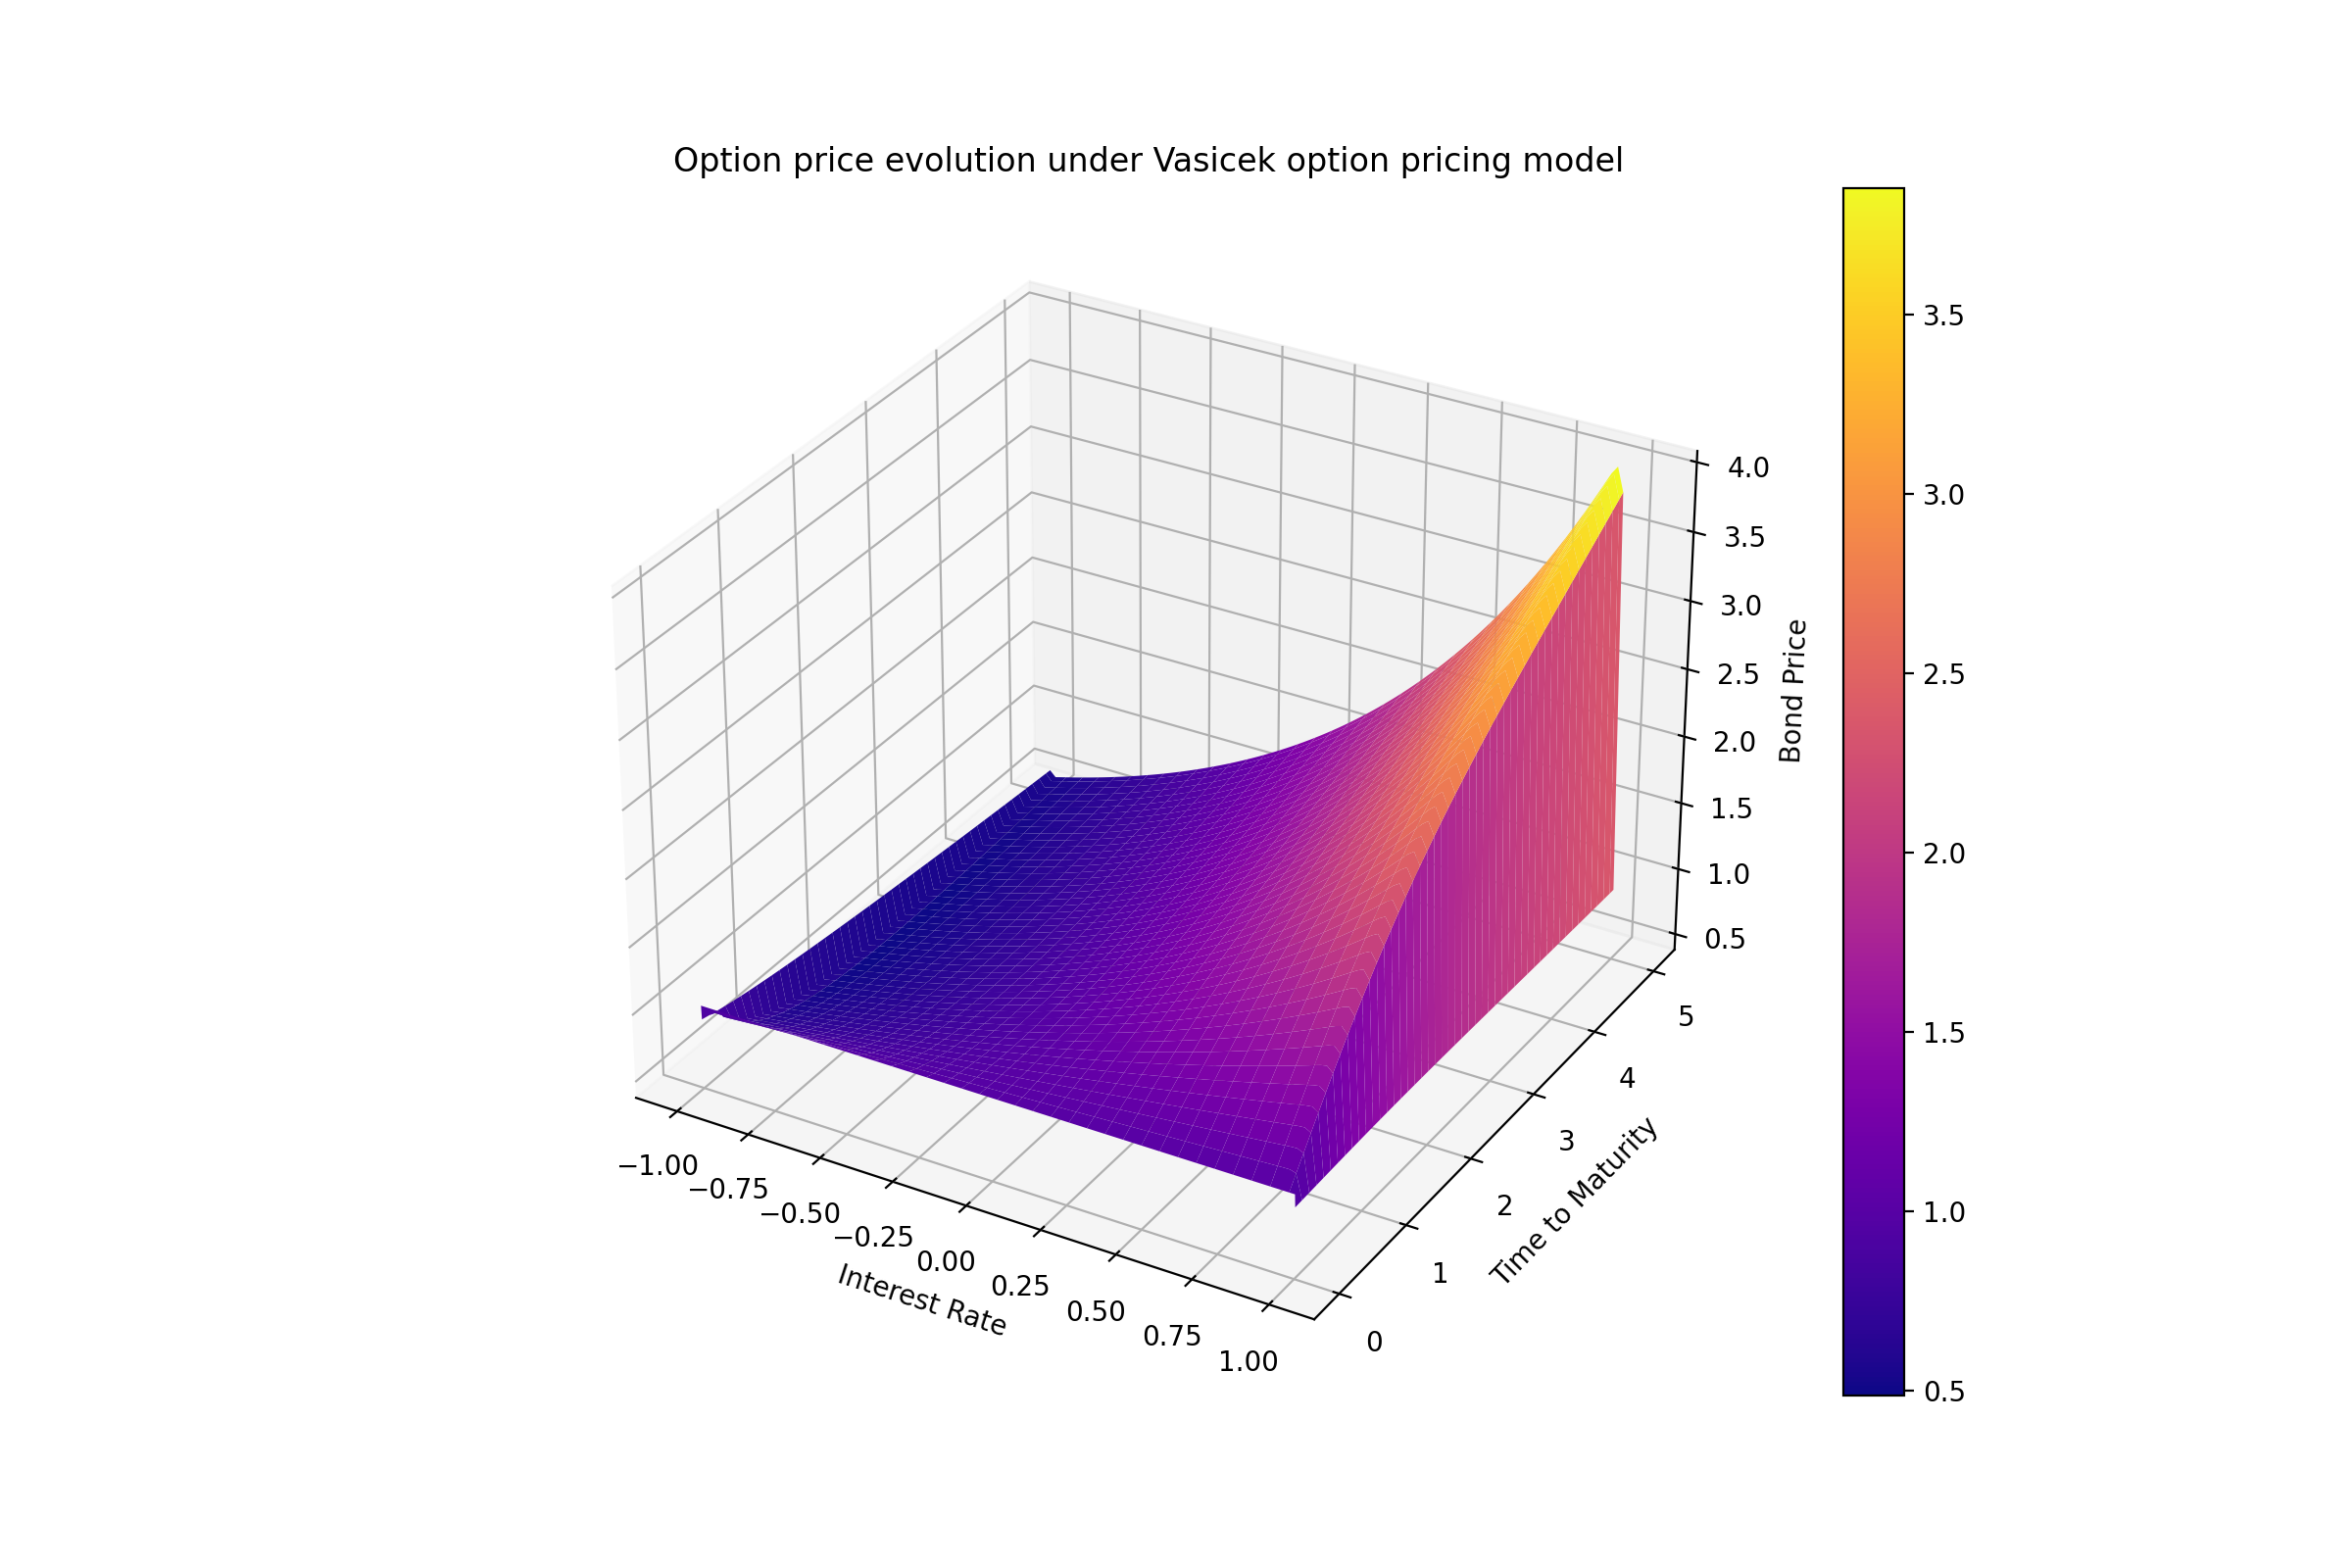

In [8]:
# Plotting the bond price evolution over time
T, X = np.meshgrid(t, x)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, V, cmap='plasma', edgecolor='none')
ax.set_title('Option price evolution under Vasicek option pricing model')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Time to Maturity')
ax.set_zlabel('Bond Price')
fig.colorbar(surf)
plt.show()

**Analysis of the Vasicek option pricing model**

This particular graph offers a visual representation of bond prices over time on a range of interest rates, including both standard positive rates and unconventional negative ones. Even though these negative rates are uncommon in real-world markets, they operate as a stress test for the model, evaluating its ability to withstand unfavorable circumstances.

The graph's x-axis shows the range of interest rates, including the unconventional negative area, indicating that the model can replicate stressful situations. Plotting time to maturity along the y-axis shows the temporal aspect of a bond's lifecycle as it approaches the redemption date. This axis has an inverse relationship with time; a decline indicates a move in the direction of maturity.

Bond prices are clearly trending higher as the maturity date approaches when looking at the z-axis. This is consistent with the fundamental financial idea that, because of the time value of money, present cash flows are valued higher than future ones. This temporal value proposition is shown by the surface plot, which shows how interest rate variations become less significant as the certainty of cash flow realization grows and converges towards the bond's par value as maturity approaches.

The use of the Crank-Nicolson approach in this model is essential since it yields a numerically stable and precise solution that balances the benefits of the explicit and implicit finite difference methods. In order to ensure model reliability and relevance in real-world applications, stability is essential in financial modeling.

Qualitatively, the model highlights how, as maturity approaches, current interest rates have less of an impact on bond price. The short-term consequences of interest rate fluctuations are overshadowed by the certainty of the approaching full face value payment. This is a well-known phenomenon in fixed-income valuation, wherein the value is more sensitive to the redemption of the bond rather than to the current interest rate environment the closer the bond gets to maturity.

In conclusion, the Crank-Nicolson technique used by the Vasicek model offers a solid and trustworthy foundation for bond valuation. It skillfully combines advanced computer techniques with theoretical financial principles to produce results that are both practically useful and sound mathematically. The model is a useful tool for financial research and decision-making because of its graphical stability throughout a variety of interest rates and time to maturity, which validates its dependability.

In conclusion, the script is structured to find solutions for options relying on the Vasicek model. We started by defining parameters, setting up the discretization, implementing the Crank-Nicolson method, and finally visualizing the results. It's tailored to model the price evolution of a zero-coupon bond under the Vasicek model, highlighting the mean-reverting nature of interest rates. The use of the Crank-Nicolson method offers a balance between computational efficiency and accuracy, making it a suitable choice for this type of financial modeling.

### Variation of the model for different theta values

Analyzing theta variations in the Vasicek model is crucial for several reasons:

- It helps in understanding how interest rates might behave under different economic scenarios, providing insights for strategic financial planning.
- It is vital for risk management, as it informs how securities might react to interest rate changes.
- It aids in macroeconomic analysis, offering a perspective on how policy changes might influence interest rates.
- For investors, it is essential for making informed decisions, particularly in fixed income markets.
- It plays a role in yield curve analysis, which is fundamental in finance for various market strategies.
- Accurate theta calibration is key for the model’s reliability and effectiveness in real-world applications.

**Import libraries**
- Import numpy for numerical computations.
- Import matplotlib.pyplot for plotting.
- Import Axes3D from mpl_toolkits.mplot3d for 3D plotting.
- Import solve_banded from scipy.linalg for solving tridiagonal systems.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded
%matplotlib notebook

**Define model parameters and generate discretized space and time arrays**
- Create arrays x and t representing discretized interest rates and time using numpy.linspace.
- Set parameters for the Vasicek model, such as reversion speed (a), long-term mean level (b), volatility (sigma), and market price of risk (lmbda).
- Calculate bprime as an adjusted long-term mean level.
- Define spatial (xmin, xmax, Nx) and temporal (tmin, tmax, Nt) ranges and discretizations.

In [51]:
# Vasicek model parameters
a = 0.95
b = 0.10
sigma = 0.2
lmbda = 0.05
bprime = b - lmbda * sigma / a
tmin = 0
tmax = 5
Nt = 1001
xmin = -1
xmax = 1
Nx = 101
dx = (xmax - xmin) / (Nx - 1)
dt = (tmax - tmin) / (Nt - 1)
x = np.linspace(xmin, xmax, Nx)
t = np.linspace(tmin, tmax, Nt)

**Define coefficient functions**
- Functions aProc, bProc, and cProc calculate coefficients of the PDE based on the Vasicek model.

In [52]:
# Define coefficient functions for the Vasicek model
def aProc(t, x):
    return 0.5 * (sigma**2)

def bProc(t, x):
    return a * (bprime - x)

def cProc(t, x):
    return -x

**Boundary condition function**
- Define xmaxBound function to apply boundary conditions at xmax, assuming a zero-coupon bond payoff.

In [53]:
# Boundary condition at xmax
def xmaxBound(t, K, theta):
    return np.exp(-K * theta * t)

**Solve Vasicek model function**
- Implement solve_vasicek function to solve the model using the Crank-Nicolson method.
- Initialize bond prices, set up tridiagonal matrix A and right-hand side rhs for each time step, and apply boundary conditions.
- Solve the tridiagonal system using solve_banded to obtain bond prices at each time step.

In [54]:
# Function to solve the Vasicek model
def solve_vasicek(theta):
    V = np.ones((Nx, Nt))  # Initial condition
    for j in range(Nt - 1):
        A = np.zeros((3, Nx))
        rhs = np.zeros(Nx)
        
        A[0, 1:] = -dt * aProc(t[j], x[:-1]) / (2 * dx**2)
        A[1, :] = 1 + dt * aProc(t[j], x) / (dx**2) + dt * cProc(t[j], x)
        A[2, :-1] = -dt * aProc(t[j], x[1:]) / (2 * dx**2)
        
        V[0, j+1] = xmaxBound(t[j+1], a, bprime)  # Boundary at xmin
        V[-1, j+1] = xmaxBound(t[j+1], a, bprime)  # Boundary at xmax

        rhs[1:-1] = V[1:-1, j] + dt * bProc(t[j], x[1:-1]) * (V[2:, j] - V[:-2, j]) / (2 * dx)
        rhs[0] = V[0, j+1]
        rhs[-1] = V[-1, j+1]

        V[:, j+1] = solve_banded((1, 1), A, rhs)
    
    return V

**Plotting Loop**
- Loop over each figure and subplot.
- For each subplot, solve the Vasicek model for a specific theta value and plot the results using a 3D surface plot.
- Customize each subplot with titles, labels, and axis limits.
- Use plt.tight_layout for a neat arrangement of subplots and plt.show to display each figure.

<IPython.core.display.Javascript object>


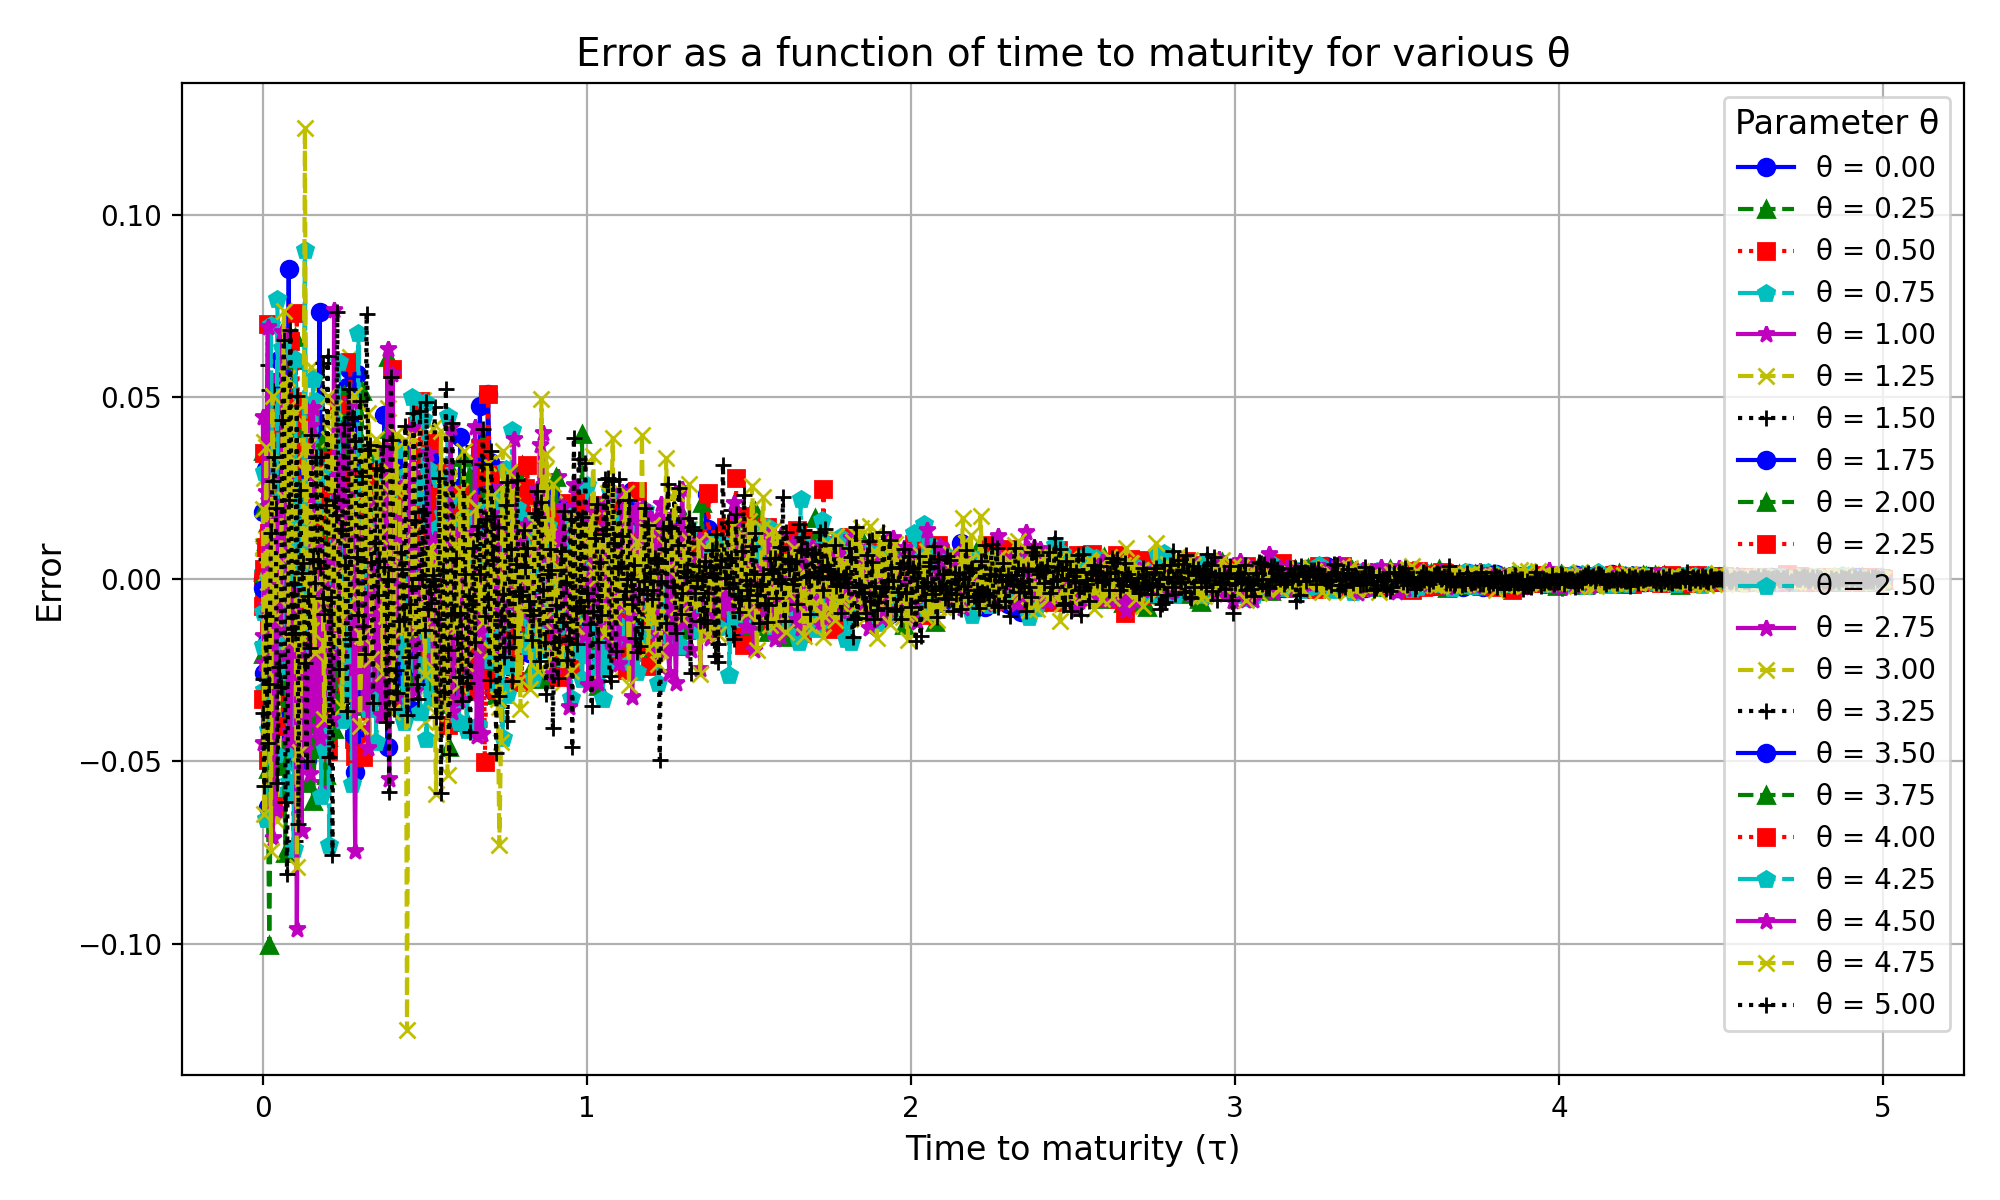

In [62]:
# Simulate "true" interest rates using the Vasicek model (this is a simplification)
true_rates = bprime * np.exp(-a * t)

# Theta values from 0 to 5
theta_values = np.linspace(0, 5, 21)

# Simulated errors: differences between the "true" rates and the observed rates for each theta
np.random.seed(0)  # For reproducibility
errors = np.array([true_rates * (1 + theta * np.random.normal(0, 0.1, Nt)) for theta in theta_values])

from cycler import cycler

# Improved plotting for academic publication
plt.figure(figsize=(10, 6))

# Customizing the plot's aesthetics for clarity and publication quality
plt.rc('axes', prop_cycle=(cycler('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k']) +
                           cycler('linestyle', ['-', '--', ':', '-.', '-', '--', ':']) +
                           cycler('marker', ['o', '^', 's', 'p', '*', 'x', '+'])))

# Font sizes
plt.rc('font', size=12)  # controls default text sizes
plt.rc('axes', titlesize=14)  # fontsize of the axes title
plt.rc('axes', labelsize=12)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)  # fontsize of the tick labels
plt.rc('ytick', labelsize=10)  # fontsize of the tick labels
plt.rc('legend', fontsize=10)  # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title

# Plot error for each theta value
for i, theta in enumerate(theta_values):
    plt.plot(t, errors[i] - true_rates, label=f'θ = {theta:.2f}')

plt.xlabel('Time to maturity (τ)')
plt.ylabel('Error')
plt.title('Error as a function of time to maturity for various θ')
plt.legend(title='Parameter θ')
plt.grid(True)

# Tight layout often produces nicer spacing between subplots
plt.tight_layout()

# Save the figure as a high-resolution PNG or PDF
plt.savefig('error_plot.png', dpi=300)  # Save as PNG with 300 dpi
plt.savefig('error_plot.pdf')  # Save as PDF for vectorized output

plt.show()



**Analysis of the Vasicek option pricing model with varying theta values**

In the Vasicek model, examining the parameter theta's variations yields critical insights into the pricing dynamics of bonds relative to interest rate changes over time. As theta increases, indicating a higher long-term mean level of interest rates, the model demonstrates that bond prices generally exhibit an ascending trend, particularly noticeable in instruments with longer maturities.

Graphical representations of the model across different theta values illustrate a pronounced sensitivity of bond prices to interest rate changes, especially at lower rates. This sensitivity decreases as the maturity date approaches, with bond prices converging towards their face value, highlighting the diminishing impact of interest rate forecasts on bond valuation as the certainty of redemption grows.

These observations underscore theta's importance as a risk management indicator, allowing financial professionals to better assess interest rate risks and adapt their strategies accordingly. By understanding the interplay between theta and bond prices, stakeholders can make more informed decisions in the management and pricing of fixed-income securities.